# Data Science in Psychology & Neuroscience (DSPN): 

## Lecture 10. Data Wrangling (part 3)

### Date: September 24, 2020

### To-Dos From Last Class:

* Download Assignment #3 start kit data
    * Just one difficulty-level... Sorry!
    
### Today:

* Wrangle imitation inhibition task data
    * Iterate through to load the first level data
    * Concatenate all together to create one data frame to rule them all
    * Merge with questionnaire data
    * Write to trial-level allsubjects csv
    * Compute summary measures
    * Save to summary allsubjects csv
* Introduce Assignment #3

### Homework

* Assignment #3
    * Now due on 10/1

## Automatic Imitation Experiment

<img src="img/ait_task.png" width="700">

* 20 trials per condition (100 total responses for each participant)
    * Average across cued response finger
* Condition mapping:
    0. Baseline 
    1. Effector congruent 
    2. Effector incongruent
    3. Movement congruent
    4. Movement incongruent

# Importing Packages

In [2]:
# Packages that are key for interacting with the OS and matching filename patterns
import os
from glob import glob # only need the glob subpackage from glob

# Packages that are key for data wrangling
import numpy as np
import pandas as pd

# to do some uber simple visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the filepaths

In [5]:
# get current working directory
script_dir = os.getcwd()

# Go above current working directory and
first_dir = os.path.join(script_dir,'misc_exercises/imitation_inhibition_paradigm/data/first') #misc_exercises/ for git
P_file_pattern = 'P*.txt'
second_dir = os.path.join(script_dir,'misc_exercises/imitation_inhibition_paradigm/data/second')
questionnaire_file = os.path.join(second_dir,'ait_questionnaires.csv')

# Using glob to find all participant data files
all_files = glob(os.path.join(first_dir,P_file_pattern))

# Loading in a test subject to make sense of things

In [6]:
# Reading in the data
sample_df = pd.read_csv(all_files[0], error_bad_lines=False, skiprows=5, sep='\t') 
print('How many rows in initial loaded data frame:',len(sample_df)) # What things might cause this to not == 100?

# Filtering the data down to just the experimental block rows
sample_df = sample_df[sample_df['Name.1']=="AI_Block"]
sample_df.loc[:, 'Finger':'Repeated']
sample_df.loc[50:300, :]

# Filtering the df down to just the key release responses
sample_df_releases = sample_df[sample_df['Released']=='Released'] 

# How many key release responses do we have?
print('How many rows in key release filtered data frame:',len(sample_df_releases)) # What things might cause this to not == 100? For now, just worry baout double responses. For this task, error rates so low that miss response trials not really important.
# print(sample_df_releases)

# Identifying double responses
sample_df_releases['shift'] = sample_df_releases['Name.2'].shift() # creating a new column ('shift') based on the next row of our trial name column. "SettingWithCopyWarning".
# print(sample_df_releases[['Name.2','shift']]) # checking that it worked, show them shift(-1) 
sample_df_releases['double_response'] = np.where(sample_df_releases['shift']==sample_df_releases['Name.2'], 1, 0) # using a numpy where conditional to identify double responses

# Filtering our double response trials
sample_df_releases_nodouble = sample_df_releases[sample_df_releases['double_response']==0] 
print('How many rows in no-double-response filtered data frame:',len(sample_df_releases_nodouble)) # Seeing if we have the right # of rows now

How many rows in initial loaded data frame: 521
How many rows in key release filtered data frame: 101
How many rows in no-double-response filtered data frame: 100


/Users/jeremyhogeveen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/jeremyhogeveen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Quick excursion into what the data frame contains...

In [7]:
# Pandas data frames are a collection of series, which are different ways of storing arrays

sample_df_releases['Finger'].values

# np.array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
#        2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
#        1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
#        2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
#        2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2])

# list([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
#        2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
#        1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
#        2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
#        2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2])

array([1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2])

# Iterating through to get all first level data, concatenating into a single data frame

In [8]:
# Setting up a pid counter to count iterations, also a blank pandas data frame
pid_counter = 1
dfs_list = [] # creating a list of pandas objects

# iterate through our participant data files
for cur_file in all_files:
    cur_df = pd.read_csv(cur_file, skiprows=5, sep='\t')
    cur_df_releases = cur_df[(cur_df['Released']=='Released') & (cur_df['Name.1']=="AI_Block")]
    cur_df_releases['double_response'] = np.where(cur_df_releases['Name.2'].shift()==cur_df_releases['Name.2'], 1, 0) # faster way to find double responses
    cur_df_releases_nodouble = cur_df_releases[cur_df_releases['double_response']==0]
    # filter to correct response trials
    cur_df_releases_nodouble_correct = cur_df_releases_nodouble[cur_df_releases_nodouble['Code']=='C']
    # Append everythng to a list of data frames
    dfs_list.append(cur_df_releases_nodouble_correct)
    # beaucse I like to confirm I got everything
    pid_counter += 1

allsubs_df = pd.concat(dfs_list, axis=0)

# checking to make sure we got all the data
print('the participant counter from our loop:',
      pid_counter-1,
      'should be roughly equivalent to our # of rows / 100:',
      allsubs_df['Congruence'].count() / 100)

/Users/jeremyhogeveen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


the participant counter from our loop: 48 should be roughly equivalent to our # of rows / 100: 45.95


# Loading in the questionnaire data and merging it with behavioral data

In [10]:
# renaming pid column in data frame -- to match the questionnaire pid column
allsubs_df = allsubs_df.rename(columns={"Name": "pid"})

# read in the questionnaire data
questionnaire_df = pd.read_csv(questionnaire_file)

# merge the questionnaires with the allsubs data
allsubs_df = pd.merge(allsubs_df,questionnaire_df,how='outer',on='pid')
# print(allsubs_df)

# Writing the observation-level data to a big csv

In [11]:
# Writing the data to a second-level data frame that we will eventually play with in R
out_filename = os.path.join(second_dir,'ait_trialwise.csv')
# pd.to_csv(allsubs_df,out_filename)
allsubs_df.to_csv(out_filename,index=False)

# Computing subject-level summary measures (mean RT by pid)

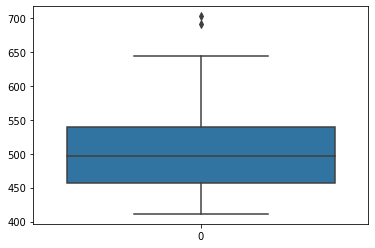

In [16]:
# computing mean RT by pid
mean_rt = allsubs_df.groupby('pid')['Time'].mean()

# plot the mean RT data by participant
sns.boxplot(data=mean_rt)

# Computing subject-level summary measures (mean RT by pid by condition)

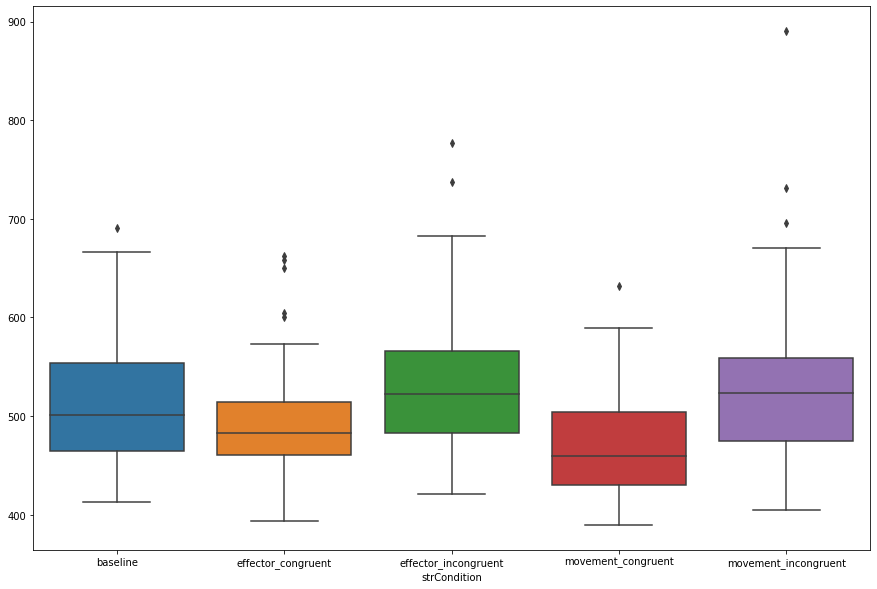

In [14]:
# generating a string conditions column baserd on the 5 congruence levels
allsubs_df['strCondition'] = np.where(allsubs_df['Congruence']==0, 'baseline',
                                      np.where(allsubs_df['Congruence']==1, 'effector_congruent',
                                               np.where(allsubs_df['Congruence']==2, 'effector_incongruent',
                                                        np.where(allsubs_df['Congruence']==3, 'movement_congruent',
                                                              np.where(allsubs_df['Congruence']==4, 'movement_incongruent','NA')))))

# computing mean RT by pid by condition
mean_cdn_rt = allsubs_df.groupby(['pid','strCondition'])['Time'].mean().unstack()
# print(mean_cdn_rt)

# create a figure
plt.figure(figsize=(15,10))
sns.boxplot(data=mean_cdn_rt)

# Writing the subject-level RT data to a CSV

In [78]:
# Writing the data to a second-level data frame that we will eventually play with in R
subj_out_filename = os.path.join(second_dir,'ait_subjectlevel.csv')
mean_cdn_rt.to_csv(subj_out_filename,index=True)